In [1]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.8 MB/s eta 0:00:00


In [2]:
# Ying Du
# INF2178 Assignment 4

file = 'INF2178_A4_data.csv'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import shapiro, levene
import numpy as np
from statsmodels.stats.power import TTestIndPower
import math

data_org = pd.read_csv(file)

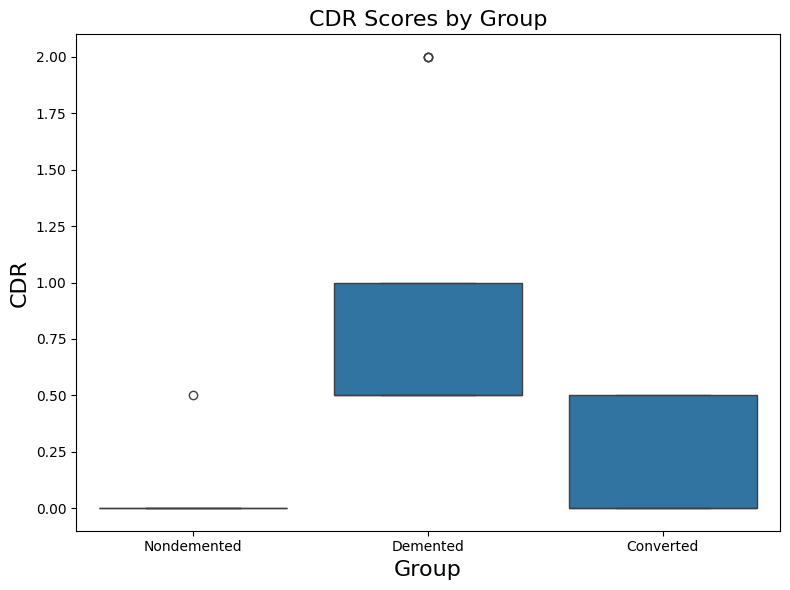

In [3]:
# Cleaning the dataset by removing rows with missing values for my focuced variables
data = data_org.dropna(subset=['Subject ID', 'Group', 'Visit', 'CDR'])


# Boxplot of CDR scores by Group
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='CDR', data=data)
plt.title('CDR Scores by Group', fontsize = 16)
plt.xlabel('Group', fontsize=16)
plt.ylabel('CDR', fontsize=16)
plt.tight_layout()

<ipython-input-4-f984daf52987>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='CDR', hue='Group', dodge=True, markers=['o', 's', 'x'], capsize=0.1, errwidth=1, palette='colorblind')


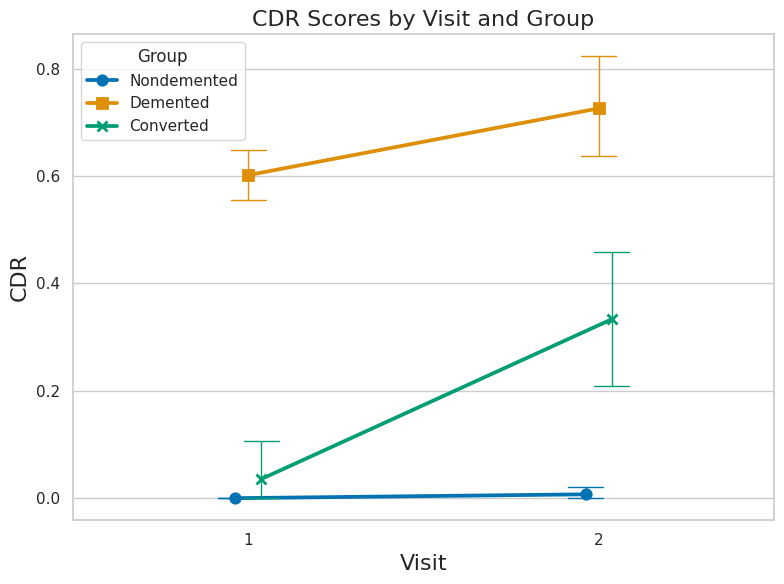

In [4]:
# Plot of the CDR Scores by Visit and Group to visualize the within and between subjects difference
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.pointplot(data=data, x='Visit', y='CDR', hue='Group', dodge=True, markers=['o', 's', 'x'], capsize=0.1, errwidth=1, palette='colorblind')
plt.xlabel('Visit', fontsize=16)
plt.ylabel('CDR', fontsize=16)
plt.title('CDR Scores by Visit and Group', fontsize = 16)
plt.tight_layout()

In [5]:
# Mixed-effect assumption tests
# Shapiro-Wilk Test on CDR scores for overall normality
shapiro_stat, shapiro_p = shapiro(data['CDR'])
print(f'Shapiro-Wilk Test on CDR Scores: Statistic={shapiro_stat}, p-value={shapiro_p}')

# Levene's Test for Homogeneity of Variances across Groups
levene_stat, levene_p = levene(data['CDR'][data['Group'] == 'Demented'], data['CDR'][data['Group'] == 'Nondemented'])
print(f"Levene's Test across 2 Groups: Statistic={levene_stat}, p-value={levene_p}")

Shapiro-Wilk Test on CDR Scores: Statistic=0.7302587032318115, p-value=1.5636155133308318e-21
Levene's Test across 2 Groups: Statistic=38.57985160099451, p-value=2.014775720504109e-09


In [6]:
# Conduct the mixed-effects ANOVA
anova_results = pg.mixed_anova(dv='CDR', within='Visit', between='Group', subject='Subject ID', data=data)
pg.print_table(anova_results)


ANOVA SUMMARY

Source           SS    DF1    DF2      MS        F    p-unc    np2      eps
-----------  ------  -----  -----  ------  -------  -------  -----  -------
Group        29.150      2    141  14.575  237.850    0.000  0.771  nan
Visit         0.459      1    141   0.459   18.992    0.000  0.119    1.000
Interaction   0.507      2    141   0.253   10.477    0.000  0.129  nan



In [7]:
# Conduct post hoc pairwise comparisons to check the detail differences
post_hocs = pg.pairwise_ttests(dv='CDR', within='Visit', between='Group', subject='Subject ID', data=data)
pg.print_table(post_hocs)


/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric          T      dof  alternative      p-unc                                               BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  -------  -------  -------------  -------  -------------------------------------------------  --------
Visit          -        1          2            True      True           -4.095  143.000  two-sided        0.000                                            222.884    -0.209
Group          -        Converted  Demented     False     True          -10.295   37.846  two-sided        0.000                                  3721000000000.000    -1.944
Group          -        Converted  Nondemented  False     True            5.602   11.265  two-sided        0.000                                          35400.000     3.624
Group          -        Demented   Nondemented  False     True           19.938   62.430  two-sided        0.000 

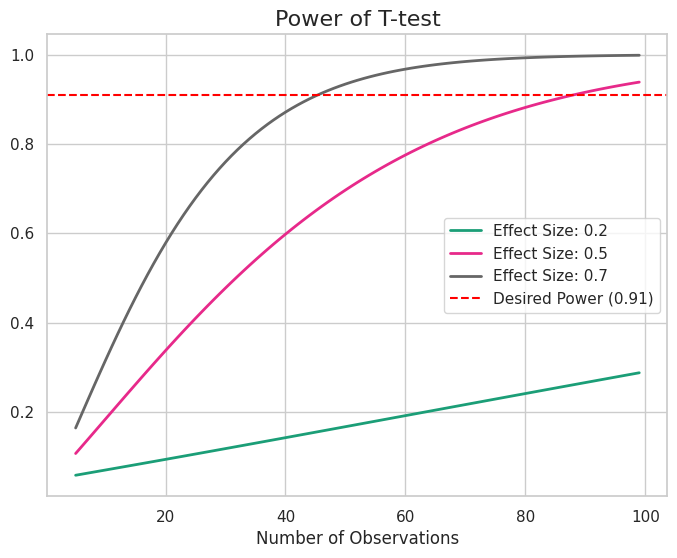

In [8]:
# Given effect size
effect_sizes = np.array([0.2, 0.5, 0.7])
# Significance level
alpha = 0.05
# Desired power
power = 0.91

analysis = TTestIndPower()

# Plot power analysis
fig, ax = plt.subplots(figsize=(8, 6))
analysis.plot_power(dep_var='nobs', nobs=np.array(range(5, 100)), effect_size=effect_sizes, alpha=alpha, ax=ax)
ax.set_title('Power of T-test', fontsize = 16)
ax.axhline(power, color='red', linestyle='--')
ax.legend([f'Effect Size: {i}' for i in effect_sizes] + ['Desired Power (0.91)'])

plt.show()


In [9]:
# Calculate sample size needed for an effect size of 0.7
sample_size = analysis.solve_power(effect_size=0.7, power=power, alpha=alpha, ratio=1.0)
print(f'Required Sample Size for Effect Size at 0.7: {math.ceil(sample_size)}')

Required Sample Size for Effect Size at 0.7: 46
